In [198]:
!pip install imblearn lazypredict

In [144]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import joblib
import time
import warnings

warnings.filterwarnings('ignore')

for dirname, subfolders, files in os.walk("../input"):
    for file in files:
        print(os.path.join(dirname, file))

../input/redwinequality/winequality_red_y_train.csv
../input/redwinequality/winequality_red_x_train.csv


In [145]:
def reverse_ohe(row):
    if row['3'] == 1:
        return 3
    elif row['4'] == 1:
        return 4
    elif row['5'] == 1:
        return 5
    elif row['6'] == 1:
        return 6
    elif row['7'] == 1:
        return 7
    elif row['8'] == 1:
        return 8
# y_df['label'] = y_df.apply(reverse_ohe, axis=1)
# y_df

In [174]:
wine_red_x_train_file = "../input/redwinequality/winequality_red_x_train.csv"
wine_red_y_train_file = "../input/redwinequality/winequality_red_y_train.csv"

wine_red_x_train = pd.read_csv(wine_red_x_train_file)
wine_red_y_train = pd.read_csv(wine_red_y_train_file)

wine_red_y_train['label'] = wine_red_y_train.apply(reverse_ohe, axis=1)
wine_red_y_train

,3,4,5,6,7,8,label
0,0,0,0,1,0,0,6
1,0,0,0,1,0,0,6
2,0,0,1,0,0,0,5
3,0,0,0,0,1,0,7
4,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...
1066,0,0,0,1,0,0,6
1067,0,0,0,1,0,0,6
1068,0,0,1,0,0,0,5
1069,0,0,0,0,1,0,7


<AxesSubplot:xlabel='label'>

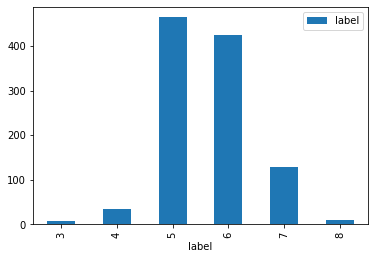

In [175]:
wine_red_y_train.groupby('label').agg({'label': 'count'}).plot.bar()

In [181]:
x_train, x_test, y_train, y_test = train_test_split(wine_red_x_train, wine_red_y_train['label'], random_state=0, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(856, 11)
(215, 11)


In [182]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler()
x_train_scld = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scld = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# x_train_scld = np.array(x_train_scld)
# x_test_scld = np.array(x_test_scld)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

# y_train

<AxesSubplot:>

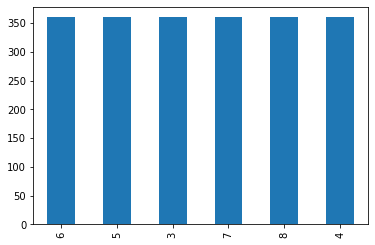

In [183]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')

x_train_balanced, y_train_balanced = oversample.fit_resample(x_train_scld,y_train)
x_test_balanced, y_test_balanced = oversample.fit_resample(x_test_scld, y_test)

y_train_balanced.value_counts().plot.bar()

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [193]:
classifiers = {
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier()
}

model_evals_scaled = {
    "model": [],
    "train_score": [],
    "test_score": []
}

In [194]:
def plot_conf_matrix(conf_mtrx):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(conf_mtrx, cmap=plt.cm.Oranges, alpha=0.3)
    
    for i in range(conf_mtrx.shape[0]):
        for j in range(conf_mtrx.shape[1]):
            ax.text(x=j, y=i, s=conf_mtrx[i,j], va='center', ha='center', size='xx-large')
    
    plt.xlabel("Predictions", fontsize=18)
    plt.ylabel("Actuals", fontsize=18)
    plt.title("Confusion Matrix", fontsize=18)
    
    plt.show()

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for key, classifier in classifiers.items():
    print(key)
#     classifier.fit(x_train_balanced,y_train_balanced)
#     preds = classifier.predict(x_test_balanced)
#     train_score = classifier.score(x_train_balanced, y_train_balanced)
    classifier.fit(x_train_scld,y_train)
    preds = classifier.predict(x_test_scld)
    train_score = classifier.score(x_train_scld, y_train)
#     rmse_ = rmse(preds, y_test)
#     precision = precision_score(y_test, preds)
#     recall = recall_score(y_test, preds)
#     f1 = f1_score(y_test, preds)
#     test_acc = accuracy_score(y_test_balanced, preds)
    test_acc = accuracy_score(y_test, preds)

    
    model_evals_scaled['model'].append(str(key))
    model_evals_scaled['train_score'].append(train_score.round(4))
    model_evals_scaled['test_score'].append(test_acc.round(4))
#     model_evals['rmse'].append(rmse_.round(4))
#     model_evals_balanced['precision'].append(precision.round(4))
#     model_evals_balanced['recall'].append(recall.round(4))
#     model_evals_balanced['f1_score'].append(f1.round(4))
    
    
#     conf_matrix = multilabel_confusion_matrix(y_true=y_test, y_pred=preds)
#     plot_conf_matrix(conf_matrix)
    
    print()
    print('-'*60)

model_vals = pd.DataFrame(model_evals_scaled)

KNeighbors

------------------------------------------------------------
SVC

------------------------------------------------------------
RandomForest

------------------------------------------------------------
AdaBoost

------------------------------------------------------------
ExtraTreesClassifier

------------------------------------------------------------


In [196]:
model_vals

,model,train_score,test_score
0,KNeighbors,0.6904,0.5488
1,SVC,0.6530,0.6326
2,RandomForest,1.0000,0.7023
3,AdaBoost,0.5759,0.5442
4,ExtraTreesClassifier,1.0000,0.6837


In [171]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
  
grid.fit(x_train_scld, y_train_balanced)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [172]:

print(grid.best_params_)
  
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [173]:
clf = grid.best_estimator_
grid_predictions = clf.predict(x_test)
  
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.64      0.56      0.59       104
           6       0.47      0.55      0.51        76
           7       0.41      0.43      0.42        28

    accuracy                           0.52       215
   macro avg       0.30      0.31      0.31       215
weighted avg       0.53      0.52      0.52       215

0.5209302325581395


In [16]:
model_file = "svc.joblib"
joblib.dump(clf, model_file)

['svc.joblib']

In [199]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train_scld, x_test_scld, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  8.99it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.59,0.42,None,0.59,0.02
LabelSpreading,0.62,0.40,None,0.62,0.09
LabelPropagation,0.62,0.40,None,0.62,0.07
ExtraTreesClassifier,0.69,0.39,None,0.67,0.23
RandomForestClassifier,0.68,0.39,None,0.67,0.31
ExtraTreeClassifier,0.60,0.39,None,0.61,0.01
LinearDiscriminantAnalysis,0.64,0.36,None,0.63,0.06
LGBMClassifier,0.62,0.36,None,0.61,0.54
BaggingClassifier,0.61,0.35,None,0.60,0.08


In [200]:
import lightgbm as lgb
from sklearn import pipeline
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

pipe = pipeline.Pipeline([
    ('clf', lgb.LGBMClassifier())
])

param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 5, 35, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}

def hyperopt(param_space, X_train, y_train, X_test, y_test, num_eval):
    start = time.time()
    
    def objective_function(params):
        clf = lgb.LGBMClassifier(**params)
        score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
        return {'loss': score, 'status': STATUS_OK}
    
    trials = Trials()
    best_param = fmin(objective_function,
                     param_space,
                     algo=tpe.suggest,
                     max_evals=num_eval,
                     trials=trials,
                     rstate=np.random.default_rng(1))
    loss = [x['result']['loss'] for x in trials.trials]
    
    best_param_values = [x for x in best_param.values()]
    
    if best_param_values[0] == 0:
        boosting_type='gbdt'
    else:
        boosting_type = 'dart'
        
    clf_best = lgb.LGBMClassifier(learning_rate=best_param_values[2],
                                 num_leaves=int(best_param_values[5]),
                                 max_depth=int(best_param_values[3]),
                                 n_estimators=int(best_param_values[4]),
                                 boosting_type=boosting_type,
                                 colsample_bytree=best_param_values[1],
                                 reg_lambda = best_param_values[6],
                                 )
    
    clf_best.fit(X_train, y_train)
    
    print()
    print("#### Results")
    print("Score best parameters: ", min(loss))
    print("Best parameters: ", best_param)
    print("Test Score: ", clf_best.score(X_test, y_test))
    print("Time elapsed: ", time.time() - start)
    print("Parameter combinations evaluated: ", num_eval)
    
    return trials

In [201]:
num_eval = 75 

results_hyperopt = hyperopt(param_hyperopt, x_train_scld, y_train, x_test_scld, y_test, num_eval)
results_hyperopt

100%|██████████| 75/75 [00:18<00:00,  4.15trial/s, best loss: 0.5654426764585884]

#### Results
Score best parameters:  0.5654426764585884
Best parameters:  {'boosting_type': 0, 'colsample_by_tree': 0.9597837002385726, 'learning_rate': 0.015935430097777738, 'max_depth': 9.0, 'n_estimators': 5.0, 'num_leaves': 5.0, 'reg_lambda': 0.7845606542277984}
Test Score:  0.6093023255813953
Time elapsed:  18.07999062538147
Parameter combinations evaluated:  75


In [202]:
pipe = pipeline.Pipeline([
    ('clf', ExtraTreesClassifier())
])

param_hyperopt = {
      'n_estimators': scope.int(hp.quniform('n_estimators', 10, 2000, 30)),
      'criterion': hp.choice('criterion', ['gini', 'entropy']),
      'max_depth': scope.int(hp.quniform('max_depth', 1, 90, 3)),
      'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 377, 3)),
      'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 377, 3)),
      'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.0, 0.6),
      'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', 2, 5, 8, 13, 21, 34, None])
}

def hyperopt(param_space, X_train, y_train, X_test, y_test, num_eval):
    start = time.time()
    
    def objective_function(params):
        clf = ExtraTreesClassifier(**params)
        score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
        return {'loss': score, 'status': STATUS_OK}
    
    trials = Trials()
    best_param = fmin(objective_function,
                     param_space,
                     algo=tpe.suggest,
                     max_evals=num_eval,
                     trials=trials,
                     rstate=np.random.default_rng(1))
    loss = [x['result']['loss'] for x in trials.trials]
    
    best_param_values = [x for x in best_param.values()]
    print(best_param)
    
    clf_best = ExtraTreesClassifier(criterion=['gini', 'entropy'][best_param['criterion']],
                                   max_depth=int(best_param['max_depth']),
                                   max_features=best_param['max_features'],
                                   min_samples_leaf=int(best_param['min_samples_leaf']),
                                   min_samples_split=int(best_param['min_samples_split']),
                                   min_weight_fraction_leaf=best_param['min_weight_fraction_leaf'],
                                   n_estimators=int(best_param['n_estimators']))
    
    clf_best.fit(X_train, y_train)
    
    print("")
    print("##### Results")
    print("Score best parameters: ", min(loss)*-1)
    print("Best parameters: ", best_param)
    print("Test Score: ", clf_best.score(X_test, y_test))
    print("Time elapsed: ", time.time() - start)
    print("Parameter combinations evaluated: ", num_eval)
    
    return trials

In [203]:
num_eval = 100
results = hyperopt(param_hyperopt, x_train, y_train, x_test, y_test, num_eval)
results

100%|██████████| 100/100 [06:27<00:00,  3.87s/trial, best loss: 0.4193934448524412]
{'criterion': 1, 'max_depth': 18.0, 'max_features': 2, 'min_samples_leaf': 312.0, 'min_samples_split': 324.0, 'min_weight_fraction_leaf': 0.07780217046167841, 'n_estimators': 1980.0}

##### Results
Score best parameters:  -0.4193934448524412
Best parameters:  {'criterion': 1, 'max_depth': 18.0, 'max_features': 2, 'min_samples_leaf': 312.0, 'min_samples_split': 324.0, 'min_weight_fraction_leaf': 0.07780217046167841, 'n_estimators': 1980.0}
Test Score:  0.5534883720930233
Time elapsed:  389.5005524158478
Parameter combinations evaluated:  100


In [204]:
clf = ExtraTreesClassifier(criterion='entropy', max_depth=18, max_features=5, min_samples_leaf=312, min_samples_split=324, 
                           min_weight_fraction_leaf=0.07780217046167841,
                          n_estimators=1980)

clf.fit(x_train_scld, y_train)
preds = clf.predict(x_test_scld)

accuracy_score(y_test, preds)

0.5720930232558139

In [216]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import make_scorer

optimizer_kwargs = {'acq_func_kwargs': {"xi": 10, "kappa": 10}}

space = {
    'n_estimators': Integer( 10, 200),
      'criterion': ['gini', 'entropy'],
      'max_depth': Integer( 1, 90),
      'min_samples_split': Integer( 2, 377),
      'min_samples_leaf': Integer(1, 377),
      'min_weight_fraction_leaf': Real(0.0, 0.5, 'uniform'),
      'max_features': ['auto', 'sqrt', 'log2']
}

clf = BayesSearchCV(estimator=ExtraTreesClassifier(),
                            search_spaces=space, scoring=make_scorer(accuracy_score, greater_is_better=True),
                            n_jobs=4, n_iter=100, iid=False, optimizer_kwargs=optimizer_kwargs,
                            verbose=1)

clf.fit(x_train_scld, y_train)

print("val score: %s" % clf.best_score_)
print("test score: %s" % clf.score(x_test_scld, y_test))
print("best params: ", clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

val score: 0.6693934448524411 <br>
test score: 0.6883720930232559 <br>
best params:  OrderedDict([('criterion', 'gini'), ('max_depth', 56), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 200)])

In [234]:
import joblib
# clf = ExtraTreesClassifier(criterion='gini', max_depth=90, max_features='sqrt', min_samples_leaf=1, 
#                            min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=200)
clf = ExtraTreesClassifier()
clf.fit(x_train_scld, y_train)

preds = clf.predict(x_test_scld)

model_file = "extra_trees_clf.joblib"
joblib.dump(clf, model_file)

print(accuracy_score(y_test, preds))


0.7116279069767442


In [237]:
etc_clf = joblib.load(os.path.join("/kaggle/working/", "extra_trees_clf.joblib"))
preds = etc_clf.predict(x_test_scld)
print(accuracy_score(y_test, preds))

0.7116279069767442


In [238]:
optimizer_kwargs = {'acq_func_kwargs': {"xi": 10, "kappa": 10}}

space = {
    'n_estimators': Integer( 10, 200),
      'criterion': ['gini', 'entropy'],
      'max_depth': Integer( 2, 90),
      'min_samples_split': Integer(2, 377),
      'min_samples_leaf': Integer(1, 10),
      'max_features': ['auto', 'log2', 'sqrt'],
}

clf = BayesSearchCV(estimator=RandomForestClassifier(),
                            search_spaces=space, scoring=make_scorer(accuracy_score, greater_is_better=True),
                            n_jobs=4, n_iter=100, iid=False, optimizer_kwargs=optimizer_kwargs,
                            verbose=1)

clf.fit(x_train_scld, y_train)

print("val score: %s" % clf.best_score_)
print("test score: %s" % clf.score(x_test_scld, y_test))
print("best params: ", clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [285]:
clf = RandomForestClassifier(criterion='entropy', max_depth=90, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, n_estimators=200)
clf.fit(x_train_scld, y_train)

preds = clf.predict(x_test_scld)

model_file = "random_forest_clf.joblib"
joblib.dump(clf, model_file)
print(accuracy_score(y_test, preds))

0.7023255813953488


In [286]:
rf_clf = joblib.load(os.path.join("/kaggle/working/", "random_forest_clf.joblib"))

preds = rf_clf.predict(x_test_scld)
print(accuracy_score(y_test, preds))

0.7023255813953488


* This took too long, the following code is no longer used

In [18]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000], 
              'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 5, 8, 13, 21, 34, 53, 54, 55, 89, None],
              'min_samples_split': [2, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377],
              'min_samples_leaf': [1, 2, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377],
              'min_weight_fraction_leaf': [x / 10 for x in range(0, 6)],
              'max_features': ['auto', 'sqrt', 'log2', 2, 5, 8, 13, 21, 34, None],
              
             }
  
grid = GridSearchCV(ExtraTreesClassifier(), param_grid, refit = True, verbose = 3)
  
grid.fit(x_train, y_train)

Fitting 5 folds for each of 2661120 candidates, totalling 13305600 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10;, score=0.517 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10;, score=0.503 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10;, score=0.567 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10;, score=0.474 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10;, score=0.602 total time=   0.0s
[CV 1/5] END criterion=

KeyboardInterrupt: 